<a href="https://colab.research.google.com/github/pramod-mamidi/DAs/blob/master/logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from sklearn.linear_model import LogisticRegression as lg
from sklearn.model_selection import train_test_split as tts
from sklearn import metrics,preprocessing
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [1]:
!wget -O ChurnData.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/ChurnData.csv

--2020-05-09 11:46:51--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/ChurnData.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36144 (35K) [text/csv]
Saving to: ‘ChurnData.csv’

ChurnData.csv       100%[===================>]  35.30K  --.-KB/s    in 0.01s   

2020-05-09 11:46:51 (2.78 MB/s) - ‘ChurnData.csv’ saved [36144/36144]



In [4]:
data=pd.read_csv('ChurnData.csv')
data.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,tollmon,equipmon,cardmon,wiremon,longten,tollten,cardten,voice,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,20.75,0.0,15.25,35.7,42.00,211.45,125.0,1.0,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,0.00,0.0,0.00,0.0,288.80,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,0.00,0.0,0.00,0.0,157.05,0.00,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,45.00,50.1,23.25,64.9,239.55,1873.05,880.0,1.0,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,22.00,0.0,23.75,0.0,47.45,166.10,145.0,1.0,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


            tenure       age   address  ...     lninc   custcat     churn
tenure    1.000000  0.431802  0.456328  ...  0.246353  0.134237 -0.376860
age       0.431802  1.000000  0.746566  ...  0.313359  0.041055 -0.287697
address   0.456328  0.746566  1.000000  ...  0.212929 -0.016841 -0.260659
income    0.109383  0.211275  0.132807  ...  0.680313  0.030725 -0.090790
ed       -0.070503 -0.071509 -0.145550  ...  0.206718  0.013127  0.216112
employ    0.445755  0.622553  0.520926  ...  0.540052  0.131292 -0.337969
equip    -0.117102 -0.071357 -0.148977  ...  0.083494  0.174955  0.275284
callcard  0.426530  0.170404  0.209204  ...  0.156920  0.407553 -0.311451
wireless -0.070590 -0.065527 -0.146478  ...  0.033558  0.598156  0.174356
longmon   0.763134  0.373547  0.421782  ...  0.122550  0.072519 -0.292026
tollmon   0.100214  0.053595 -0.015564  ...  0.007098  0.653991  0.014356
equipmon -0.043274 -0.030402 -0.125212  ...  0.095942  0.333664  0.255348
cardmon   0.489857  0.203202  0.297395

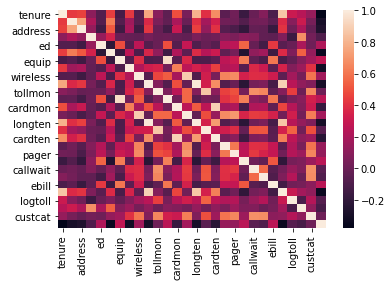

In [6]:
crr=data.corr()
print(crr)
sb.heatmap(crr)

In [11]:
x=data[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip']].values
x[0:5]

array([[ 11.,  33.,   7., 136.,   5.,   5.,   0.],
       [ 33.,  33.,  12.,  33.,   2.,   0.,   0.],
       [ 23.,  30.,   9.,  30.,   1.,   2.,   0.],
       [ 38.,  35.,   5.,  76.,   2.,  10.,   1.],
       [  7.,  35.,  14.,  80.,   2.,  15.,   0.]])

In [10]:
y=data[['churn']].values
y[0:5]

array([[1.],
       [1.],
       [0.],
       [0.],
       [0.]])

In [16]:
x = preprocessing.StandardScaler().fit(x).transform(x)
x[0:5]

array([[-1.13518441, -0.62595491, -0.4588971 ,  0.4751423 ,  1.6961288 ,
        -0.58477841, -0.85972695],
       [-0.11604313, -0.62595491,  0.03454064, -0.32886061, -0.6433592 ,
        -1.14437497, -0.85972695],
       [-0.57928917, -0.85594447, -0.261522  , -0.35227817, -1.42318853,
        -0.92053635, -0.85972695],
       [ 0.11557989, -0.47262854, -0.65627219,  0.00679109, -0.6433592 ,
        -0.02518185,  1.16316   ],
       [-1.32048283, -0.47262854,  0.23191574,  0.03801451, -0.6433592 ,
         0.53441472, -0.85972695]])

In [0]:
train_x,test_x,train_y,test_y=tts(x,y,test_size=0.3,random_state=4)

In [23]:
regr=lg(C=0.1,solver='saga')
regr.fit(train_x,train_y)
prediction=regr.predict(test_x)
prediction[0:5]

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0., 0., 0., 0., 0.])

In [24]:
print("the accuracy of the model is",metrics.log_loss(test_y,prediction))
print("the accuracy of the model is",metrics.accuracy_score(test_y,prediction))
print("the accuracy of the model is",metrics.jaccard_similarity_score(test_y,prediction))
print("the accuracy of the model is",metrics.f1_score(test_y,prediction))


the accuracy of the model is 8.059061152102995
the accuracy of the model is 0.7666666666666667
the accuracy of the model is 0.7666666666666667
the accuracy of the model is 0.3636363636363636


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)
